In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
with open("./handclassoutput_vs_intermediate_100000.json") as f:
    results = json.load(f)

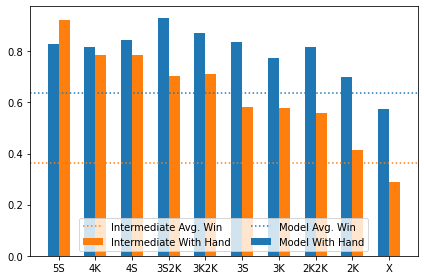

In [4]:
cats = ['5S', '4K', '4S', '3S2K', '3K2K', '3S', '3K', '2K2K', '2K', 'X']
x = np.arange(len(cats))
width = 0.3

p0 = [r['player_0_win_mean'] for r in results[:-2:2]]
p1 = [r['player_1_win_mean'] for r in results[1:-2:2]]

fig, ax = plt.subplots()

p0_avg = results[-1]["player_0_win_mean"]
p1_avg = results[-1]["player_1_win_mean"]

bars1 = ax.bar(x - width / 2,  p0, width, label='Model With Hand', color="tab:blue")
l1 = ax.axhline(linestyle=":", y=p0_avg, label="Model Avg. Win", color="tab:blue", )

bars2 = ax.bar(x + width / 2,  p1, width, label='Intermediate With Hand', color="tab:orange")
l2 = ax.axhline(linestyle=":", y=p1_avg, label="Intermediate Avg. Win", color="tab:orange")

handles, labels = ax.get_legend_handles_labels()
import operator
hl = sorted(zip(handles, labels),
            key=operator.itemgetter(1))
handles2, labels2 = zip(*hl)

ax.legend(handles2, labels2, ncol=2, loc='lower center')

ax.set_xticks(x)
ax.set_xticklabels(cats)


# ax.bar_label(bars1, padding=3)
# ax.bar_label(bars2, padding=3)

fig.tight_layout()


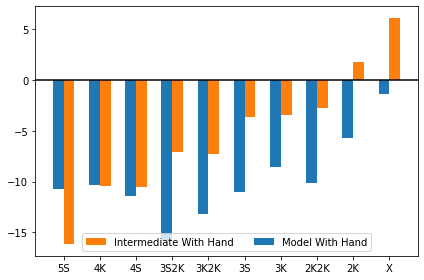

In [15]:
cats = ['5S', '4K', '4S', '3S2K', '3K2K', '3S', '3K', '2K2K', '2K', 'X']
x = np.arange(len(cats))
width = 0.3

p0 = [(1-r['player_0_win_mean'])*r['player_0_losing_score_mean'] - r['player_0_win_mean']*r['player_1_losing_score_mean'] for r in results[:-2:2]]
p1 = [(1-r['player_1_win_mean'])*r['player_1_losing_score_mean'] - r['player_1_win_mean']*r['player_0_losing_score_mean'] for r in results[1:-2:2]]

fig, ax = plt.subplots()

p0_avg = results[-1]["player_0_win_mean"]
p1_avg = results[-1]["player_1_win_mean"]

bars1 = ax.bar(x - width / 2,  p0, width, label='Model With Hand', color="tab:blue")
l1 = ax.axhline(color="black", y=0,)

bars2 = ax.bar(x + width / 2,  p1, width, label='Intermediate With Hand', color="tab:orange")
# l2 = ax.axhline(linestyle=":", y=p1_avg, label="Intermediate Avg. Win", color="tab:orange")

handles, labels = ax.get_legend_handles_labels()
import operator
hl = sorted(zip(handles, labels),
            key=operator.itemgetter(1))
handles2, labels2 = zip(*hl)

ax.legend(handles2, labels2, ncol=2, loc='lower center')

ax.set_xticks(x)
ax.set_xticklabels(cats)


# ax.bar_label(bars1, padding=3)
# ax.bar_label(bars2, padding=3)

fig.tight_layout()
